In [1]:
import pandas as pd
import numpy as np

In [58]:
data = pd.read_html("https://en.wikipedia.org/wiki/100_metres")


In [59]:
men100 = data[5]
women100 = data[6]

In [60]:
men100.head()

,Year,Time,Athlete,Place
0,1972,10.07,Valeriy Borzov (URS),Munich
1,1973,10.15,Steve Williams (USA),Dakar
2,1974,9.9h,Steve Williams (USA),Los Angeles
3,1975,10.05,Steve Riddick (USA),Zürich
4,1976,10.06,Hasely Crawford (TRI),Montreal


In [61]:
men100.Time = men100.Time.str.replace('h','', regex=False)
men100.Time = men100.Time.str.replace('[A]','', regex=False)

In [62]:
women100.Time = women100.Time.str.replace('h','', regex=False).str.replace('[A]','', regex=False).str.replace('[a]','', regex=False)

In [63]:
women100.Time = women100.Time.astype('float')

In [64]:
men100.Time = men100.Time.astype('float')

In [65]:
women100.Place = women100.Place.astype("category")

In [66]:
men100.Place = men100.Place.astype("category")

In [67]:
women100.dtypes


Year          int64
Time        float64
Athlete      object
Place      category
dtype: object

## Plot the data

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
color_pal = sns.color_palette()

In [80]:
men100["Name"] = men100["Year"].astype("str") + "; " + men100["Athlete"]

In [92]:
women100["Name"] = women100["Year"].astype("str") + "; " + women100["Athlete"]

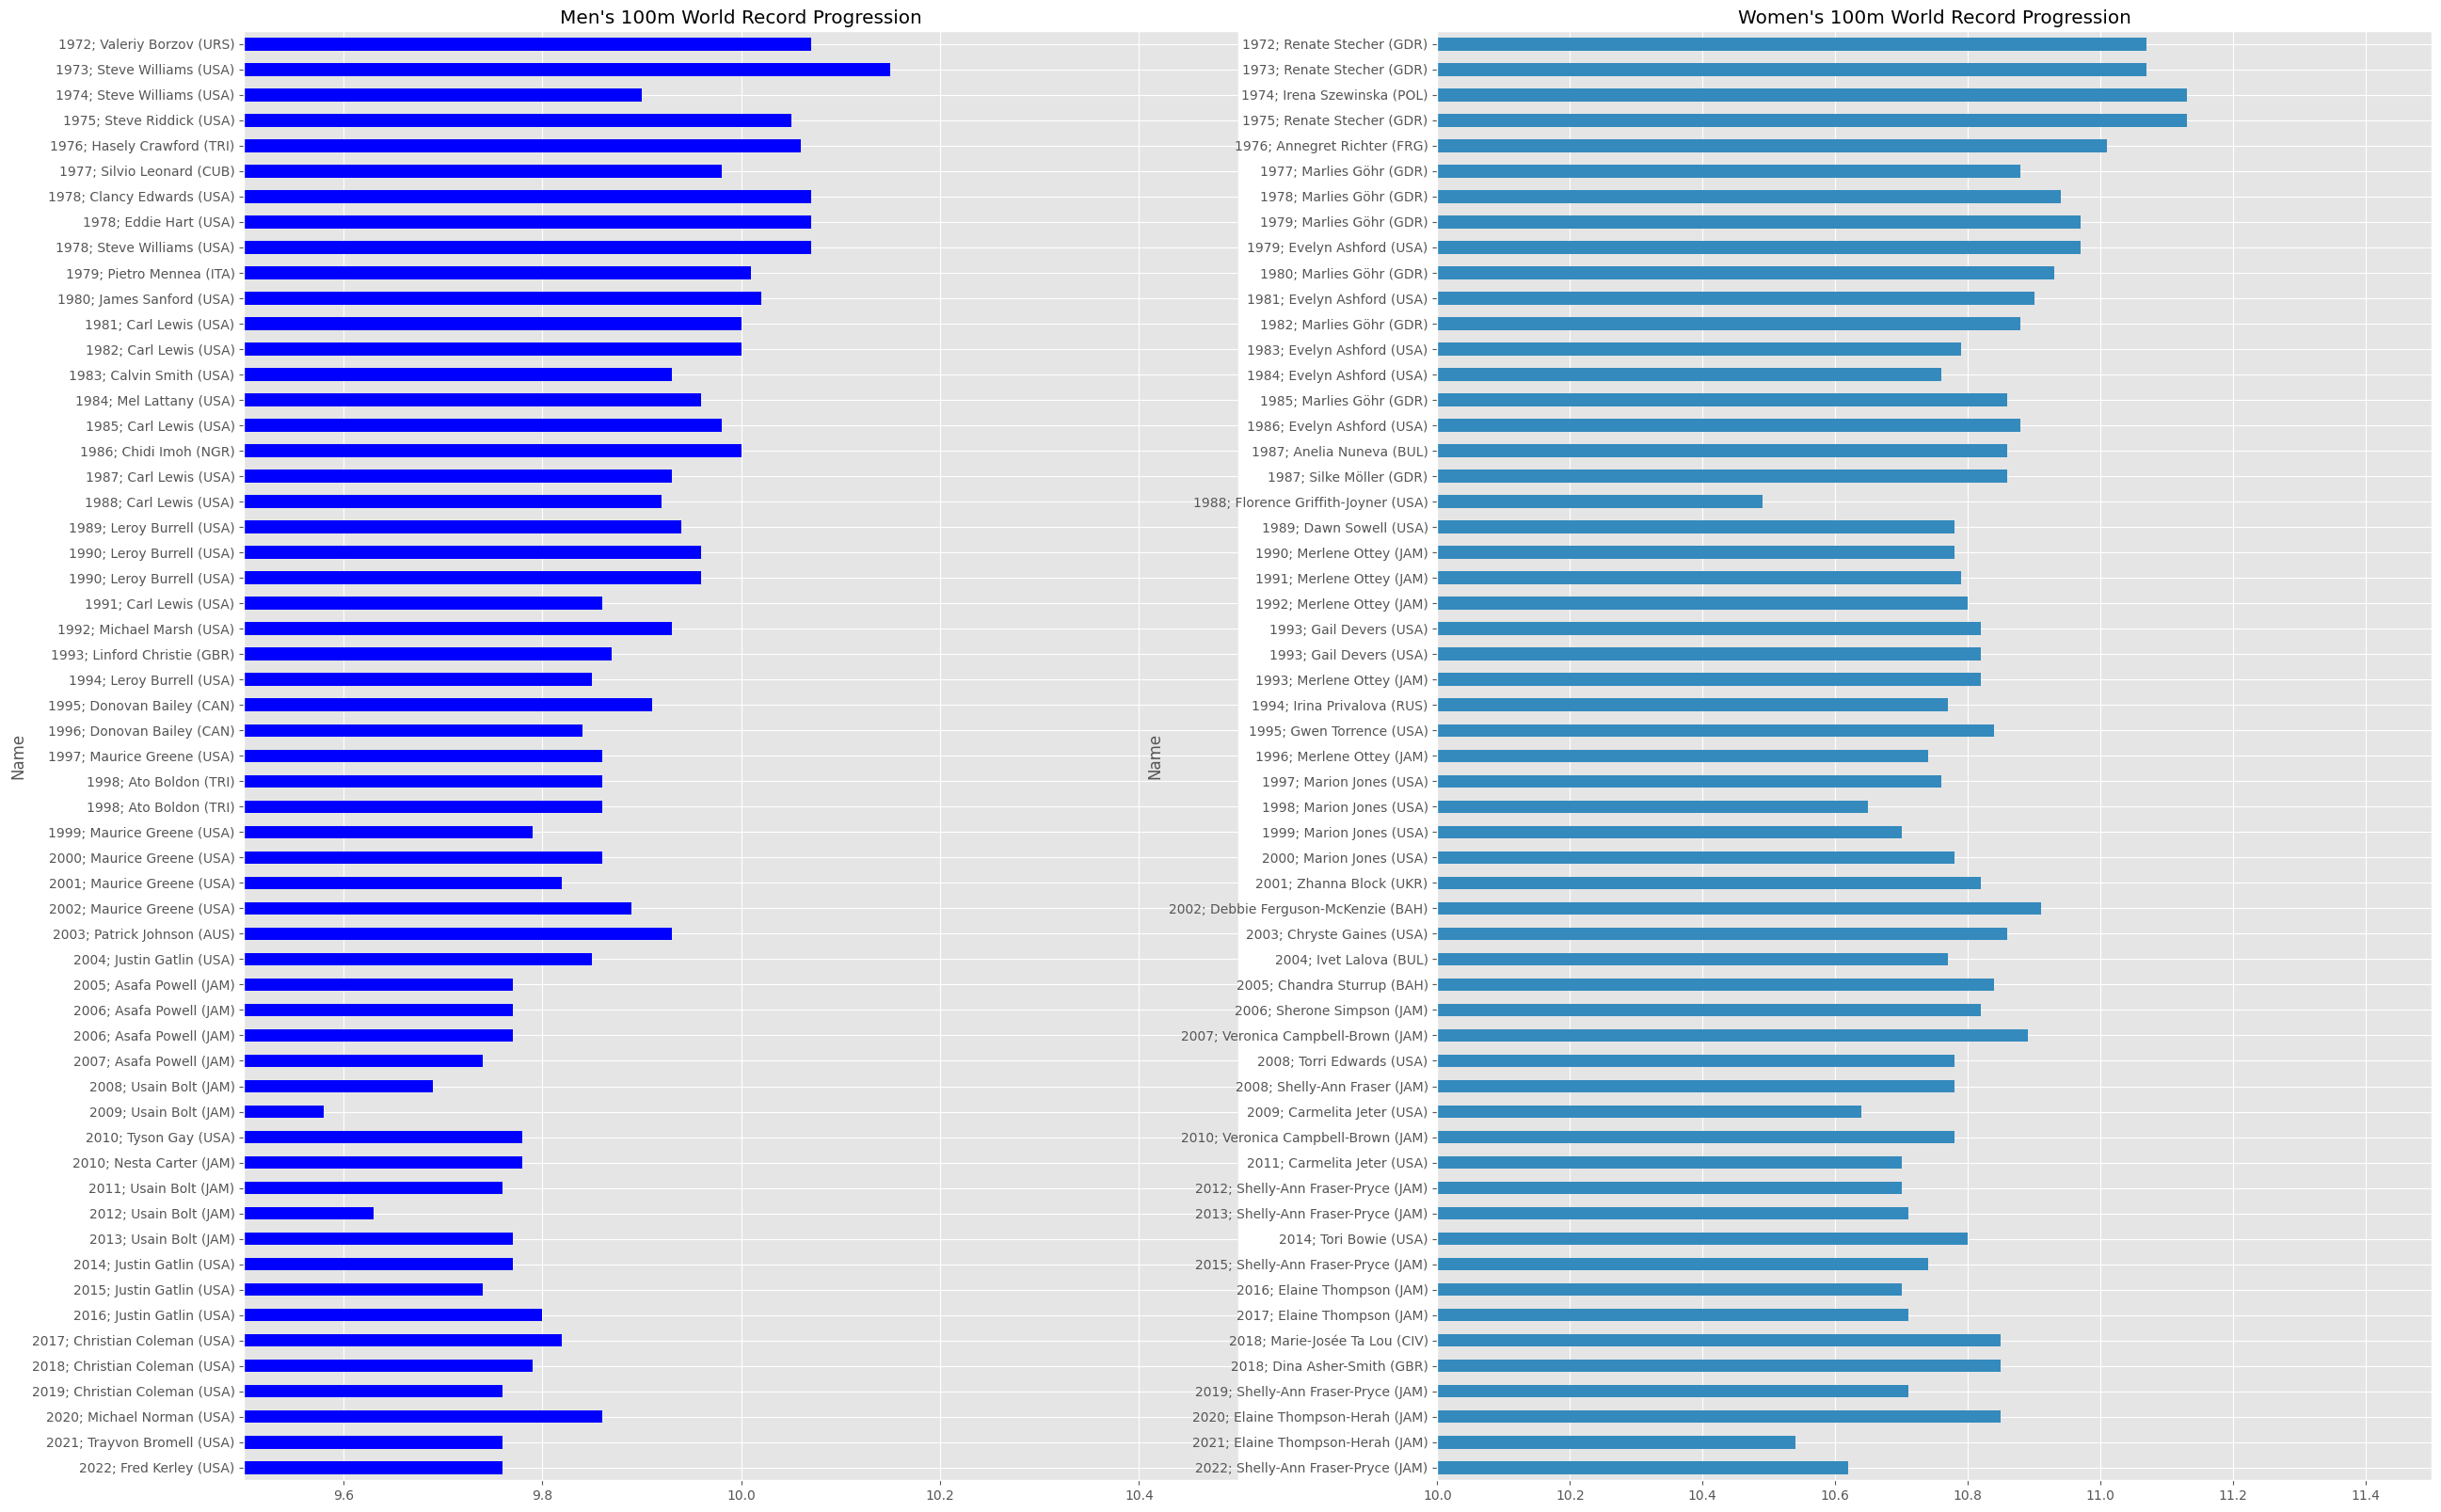

In [125]:
fig, axs = plt.subplots(1, 2, figsize = (30, 20))

men100.sort_values("Year", ascending=False).set_index("Name")["Time"].plot(kind = "barh", ax=axs[0], color = "blue")
ax = axs[0].set_xlim(9.5, 10.5)
ax = axs[0].set_title("Men's 100m World Record Progression")

women100.sort_values("Year", ascending=False).set_index("Name")["Time"].plot(kind = "barh", ax=axs[1], color = color_pal[1])
ax = axs[1].set_xlim(10, 11.5)
ax = axs[1].set_title("Women's 100m World Record Progression")

plt.show()